<a href="https://colab.research.google.com/github/Hairychest/sparks-manaidu-codes/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
#Name : Masavarapu AppalaNaidu

# Importing required libraries

In [174]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Importing dataset and Summarizing the data

In [175]:

dataset = pd.read_csv('/content/Iris.csv')
print(dataset.head())
print('number of training data',len(dataset))
print('number of features',dataset.shape[1]-2)
print('number of species',len(dataset['Species'].unique()))
print('number of species',dataset['Species'].unique())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
number of training data 150
number of features 4
number of species 3
number of species ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


# Data Visualisation

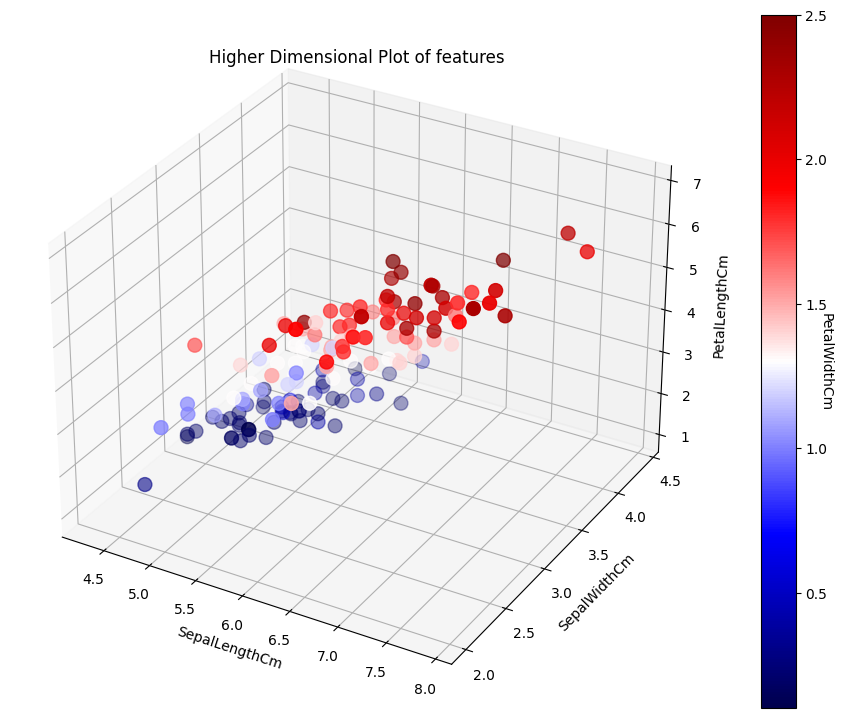

In [176]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(111, projection='3d')

x = dataset.iloc[:,1]
y = dataset.iloc[:,2]
z = dataset.iloc[:,3]
c = dataset.iloc[:,4]

img = ax.scatter(x, y, z,c=c,cmap='seismic',s=100)

plt.xlabel('SepalLengthCm')
plt.title('Higher Dimensional Plot of features')
plt.ylabel('SepalWidthCm')
ax.set_zlabel('PetalLengthCm');
cbar =fig.colorbar(img)
cbar.ax.set_ylabel('PetalWidthCm', rotation = 270);
plt.show()

# Using KMeans

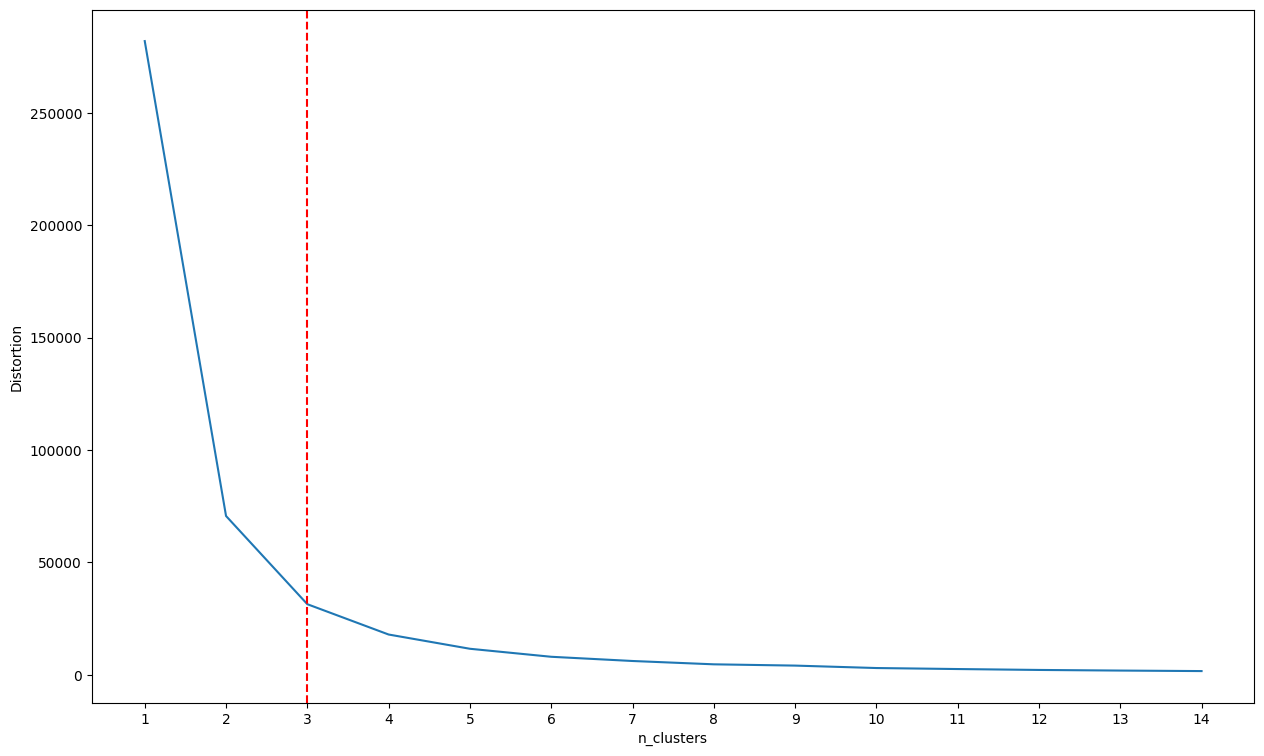

In [177]:
#instantiate KMeans
metric_list=[]
label_n =[]
cent_list = []
for i in range(1,15):
    km = KMeans(i,n_init='auto')
    km.fit(dataset.iloc[:,:-1])
    metric_list.append(km.inertia_)
    label_n.append(km.labels_)
    cent_list.append(km.cluster_centers_)
plt.figure(figsize=(15,9))    
plt.plot(range(1,15),metric_list)
plt.xticks(np.arange(1,15))
plt.xlabel('n_clusters')    
plt.ylabel('Distortion')
plt.axvline(x=3,linestyle='--',c='red')
plt.show()

# Principle Component Analysis

In [178]:
#using PCA to convert 4 features into 2 features
#instantiate PCA
pca = PCA(n_components=2)
pca_dataset =pca.fit_transform(dataset.iloc[:,:-1])

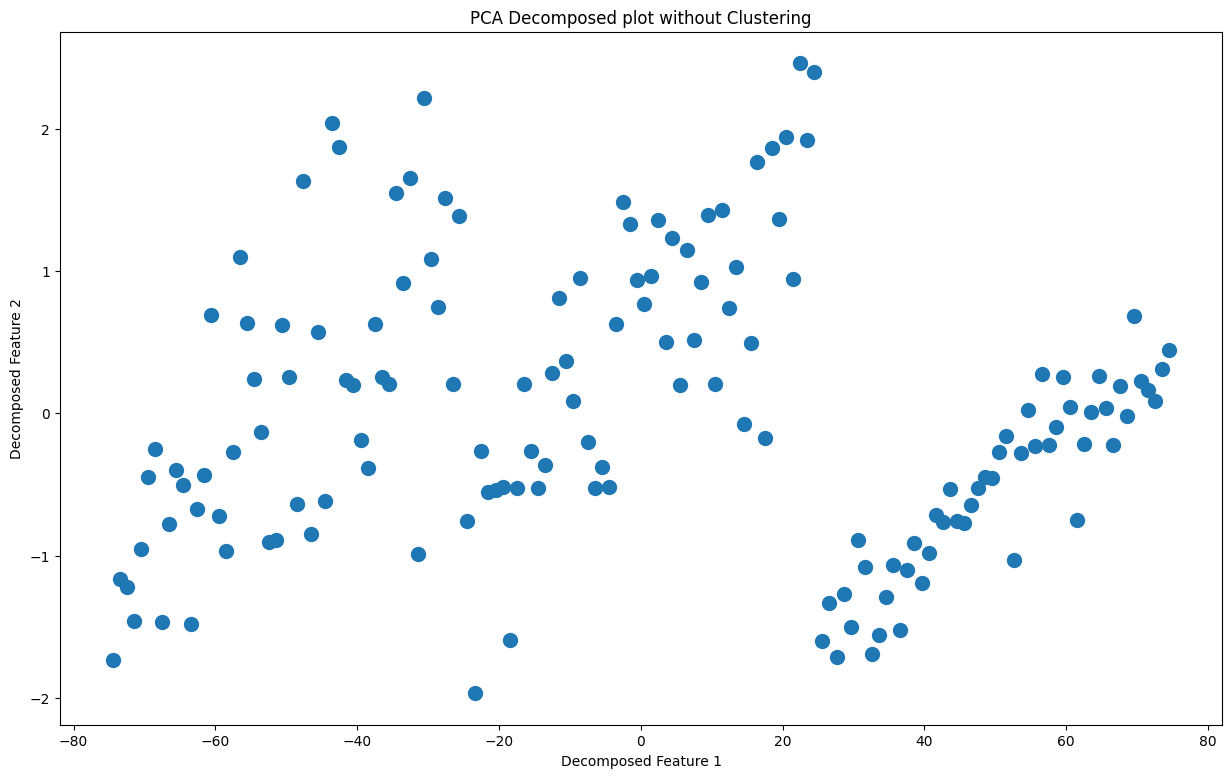

In [179]:
#visualizing decomposed features
plt.figure(figsize=(15,9)) 
plt.title('PCA Decomposed plot without Clustering')
plt.scatter(pca_dataset[:,0],pca_dataset[:,1],s=100)
plt.xlabel('Decomposed Feature 1')
plt.ylabel('Decomposed Feature 2')
plt.show()

### Using PCA we have succesfully visualized our data and clearly we can assume 3 clusters but we need to do furthur analysis.

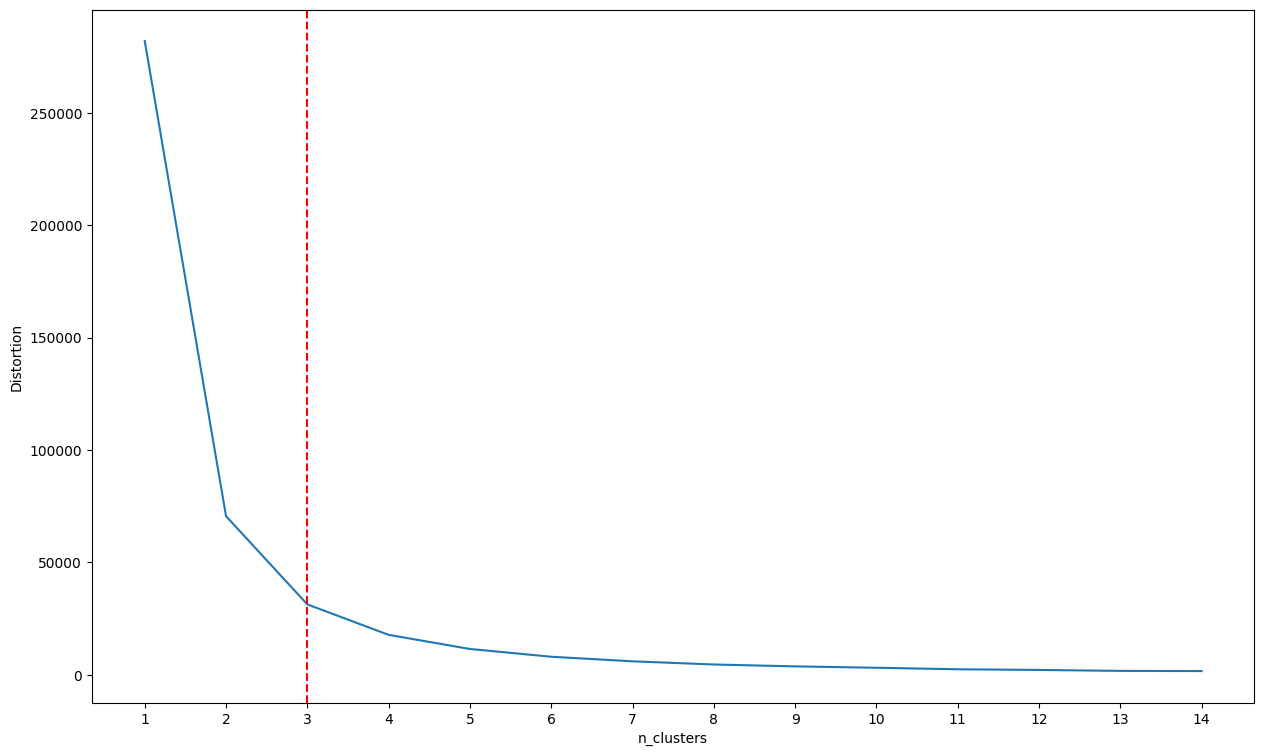

In [180]:
#instantiate KMeans
metric_list=[]
label_n =[]
cent_list = []
for i in range(1,15):
    km = KMeans(i,n_init='auto')
    km.fit(pca_dataset)
    metric_list.append(km.inertia_)
    label_n.append(km.labels_)
    cent_list.append(km.cluster_centers_)
plt.figure(figsize=(15,9)) 
plt.plot(range(1,15),metric_list)
plt.xticks(np.arange(1,15))
plt.xlabel('n_clusters')    
plt.ylabel('Distortion')
plt.axvline(x=3,linestyle='--',c='red')
plt.show()

### Using Elbow method and Principle Component Analysis we have got our Optimial clusters i.e 3 clusters

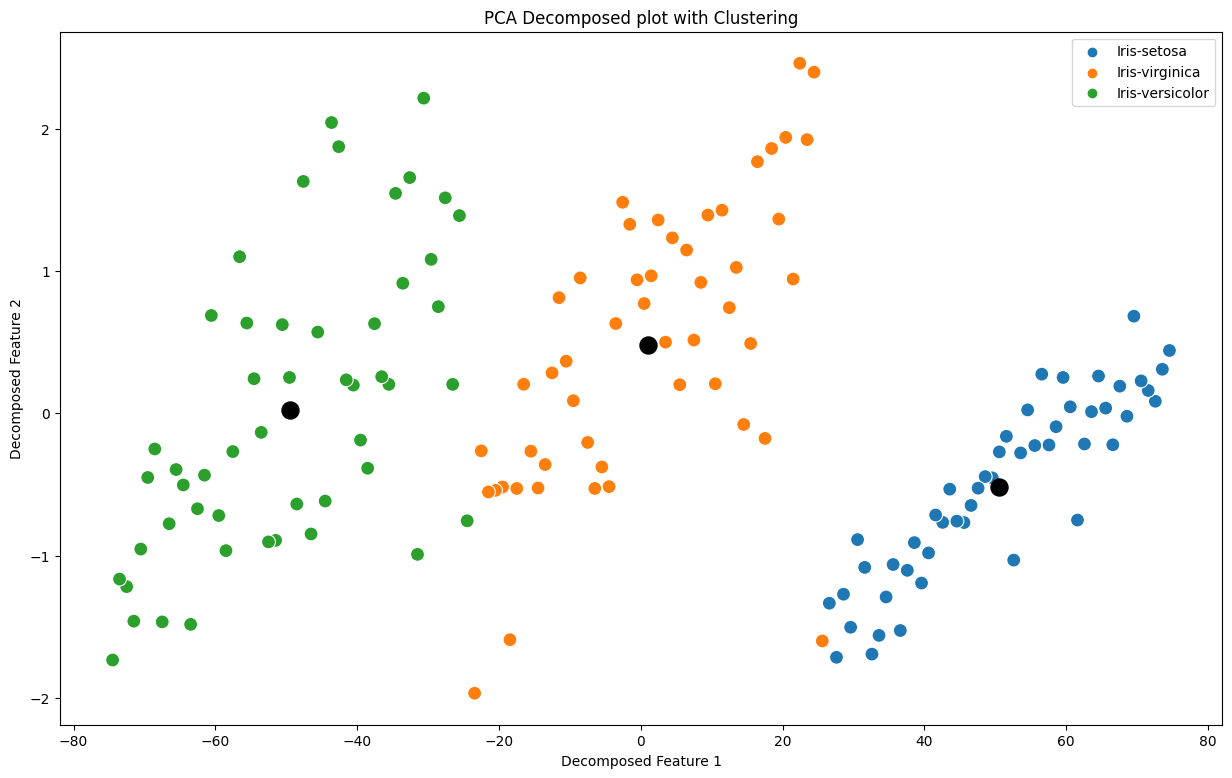

In [181]:
categories = ['Iris-virginica','Iris-setosa','Iris-versicolor']
labels=[]
 
for p,j in enumerate(label_n[2]):
         labels.append(categories[j])
plt.figure(figsize=(15,9))          
plt.title('PCA Decomposed plot with Clustering')
sns.scatterplot(x= pca_dataset[:,0],y=pca_dataset[:,1],hue=labels,s=100)
plt.scatter(cent_list[2][:,0],cent_list[2][:,1],c='black',s=150)
plt.xlabel('Decomposed Feature 1')
plt.ylabel('Decomposed Feature 2')
plt.show()

## Each and every classes are seperated in the plot

# T-SNE 

In [182]:
#using T-SNE to convert 4 features into 2 features
#instantiate T-SNE
tsne = TSNE(n_components=2,n_iter=250)
tsne_dataset =tsne.fit_transform(dataset.iloc[:,:-1])

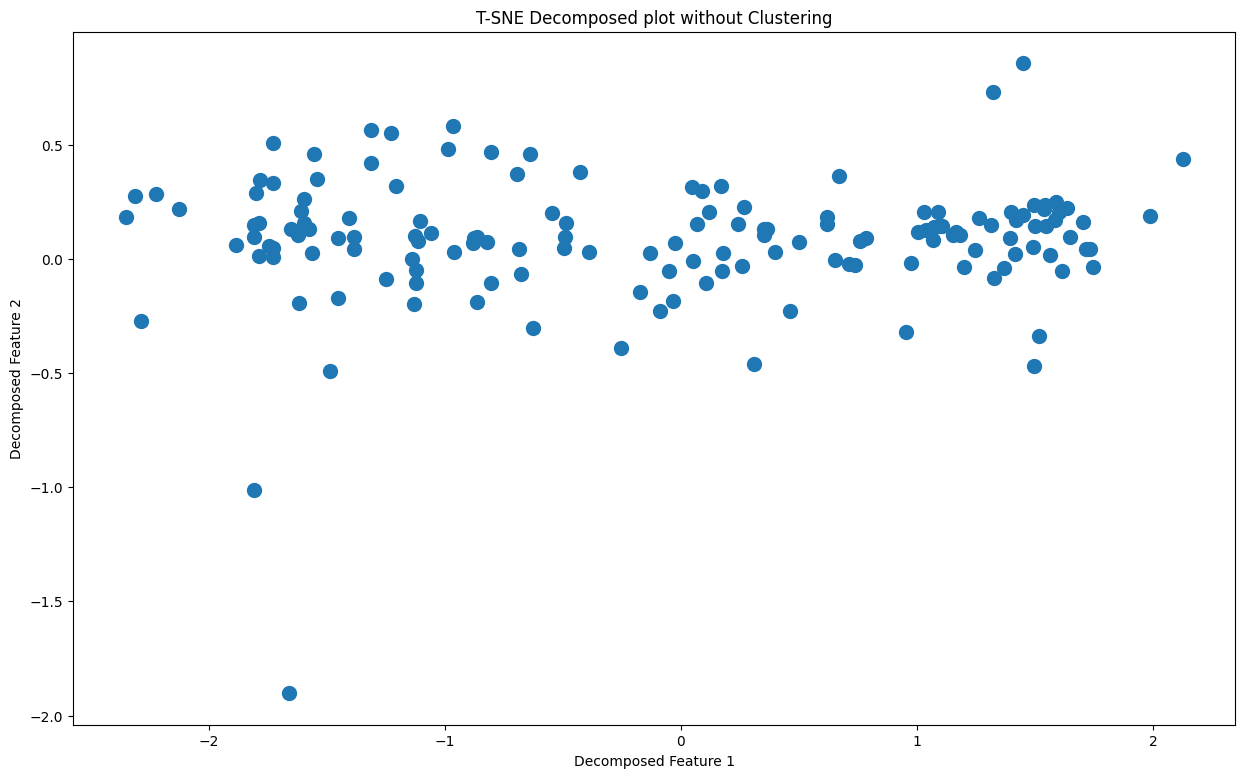

In [183]:
#visualizing decomposed features
plt.figure(figsize=(15,9)) 
plt.title('T-SNE Decomposed plot without Clustering')
plt.scatter(tsne_dataset[:,0],tsne_dataset[:,1],s=100)
plt.xlabel('Decomposed Feature 1')
plt.ylabel('Decomposed Feature 2')
plt.show()

### Using T-SNE we have succesfully visualized our data and clearly we can assume 3 clusters but we need to do furthur analysis.

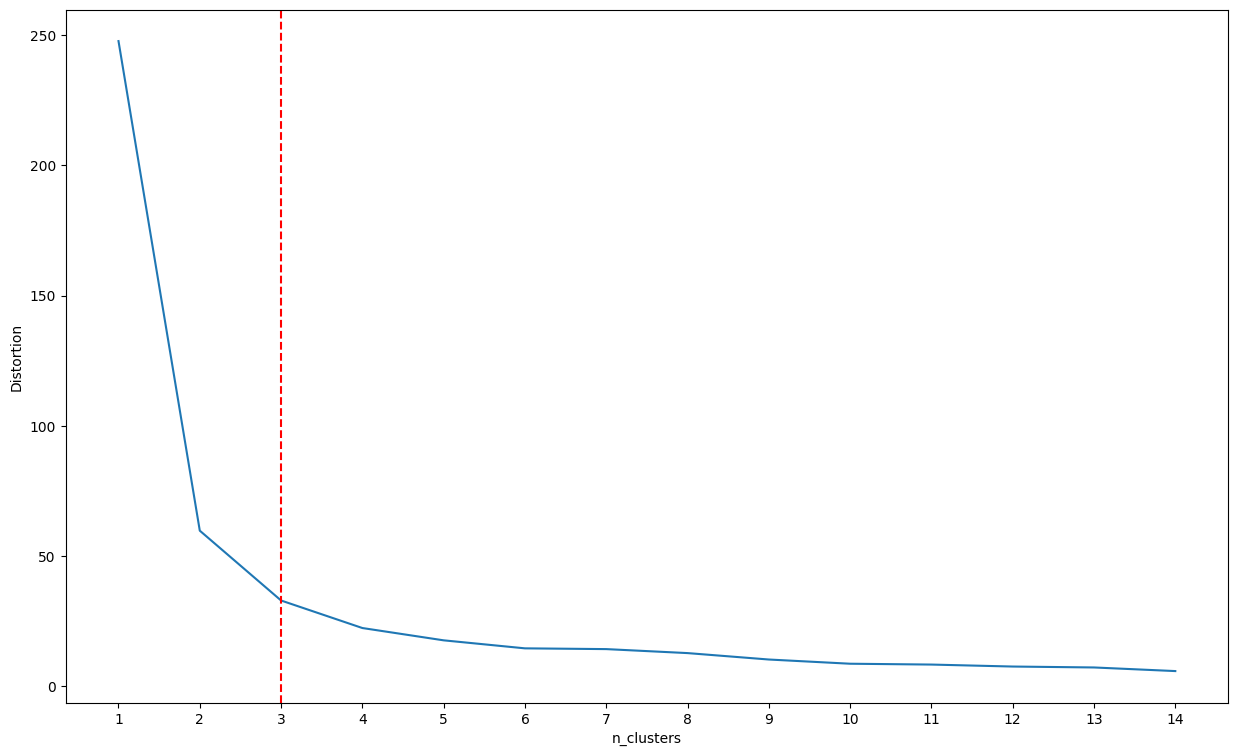

In [184]:
#instantiate KMeans
metric_list=[]
label_n =[]
cent_list = []
for i in range(1,15):
    km = KMeans(i,n_init='auto')
    km.fit(tsne_dataset)
    metric_list.append(km.inertia_)
    label_n.append(km.labels_)
    cent_list.append(km.cluster_centers_)
plt.figure(figsize=(15,9)) 
plt.plot(range(1,15),metric_list)
plt.xticks(np.arange(1,15))
plt.xlabel('n_clusters')    
plt.ylabel('Distortion')
plt.axvline(x=3,linestyle='--',c='red')
plt.show()

### Using Elbow method and T-SNE Decomposition we have got our Optimial clusters i.e 3 clusters

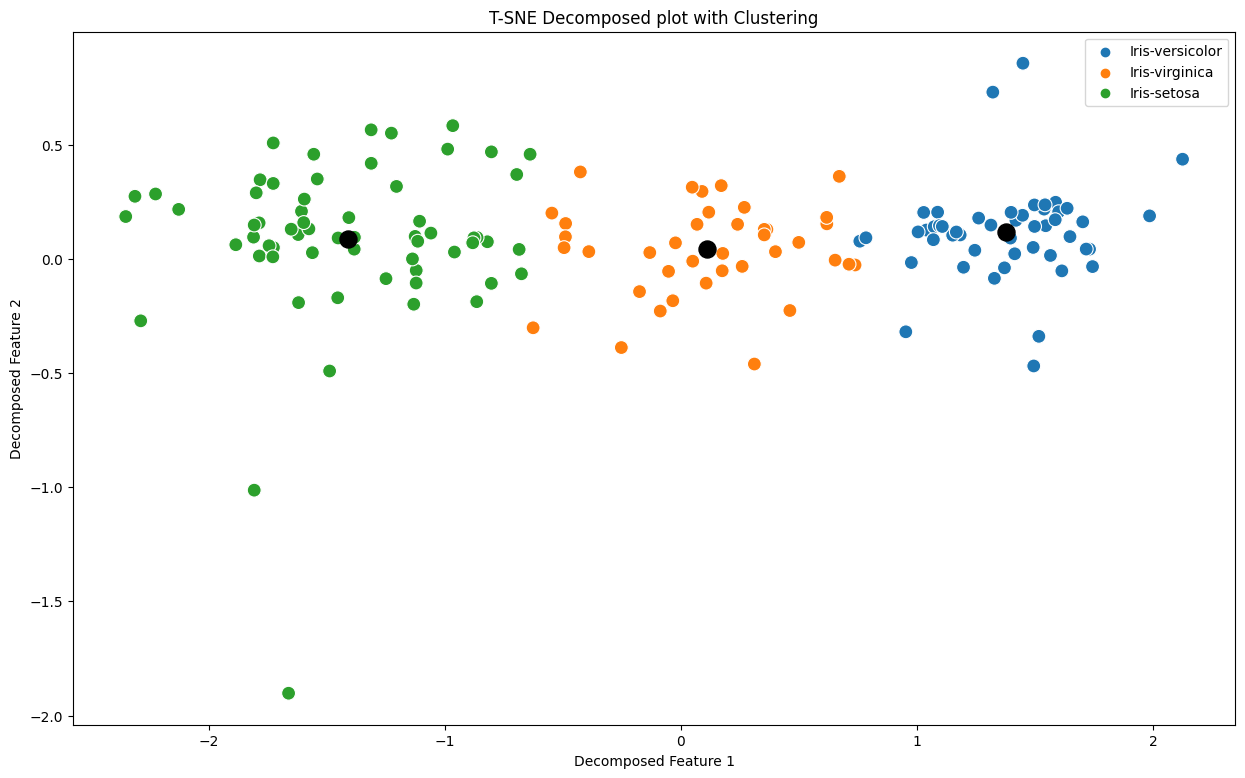

In [185]:
categories = ['Iris-virginica','Iris-setosa','Iris-versicolor']
labels=[]
 
for p,j in enumerate(label_n[2]):
         labels.append(categories[j])

plt.figure(figsize=(15,9)) 
plt.title('T-SNE Decomposed plot with Clustering')
sns.scatterplot(x= tsne_dataset[:,0],y=tsne_dataset[:,1],hue=labels,s=100)
plt.scatter(cent_list[2][:,0],cent_list[2][:,1],c='black',s=150)
plt.xlabel('Decomposed Feature 1')
plt.ylabel('Decomposed Feature 2')
plt.show()

### T-SNE gives best Clustering than PCA , So we choose the above plot for clustering
